## Task-5 Exploratory Data Analysis Of SampleSuperstore 

problem statement:Perform ‘Exploratory Data Analysis’ on the provided dataset ‘SampleSuperstore’

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [5]:
df=pd.read_csv("SampleSuperstore.csv")
df.head(6)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694


### EXPLORATORY DATA ANALYSIS

In [6]:
#row,column count of data
df.shape

(9994, 13)

In [7]:
# name of the columns
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [8]:
# object type
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

## Now checking is there any null values 

In [9]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Since there are no missing values. Hence we can do exploratory analysis part directly.And checking which columns are not required we will drop them 

But there is no such columns

In [10]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

This clearly shows that data is of united state only , so we can drop the 'Country' column as we dont need any analysis to be done based on it.

In [11]:
#dropping Country column
df=df.drop('Country',axis=1)
df.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


After looking the data we can analyse it in two different ways

1.product level 2.customer level 

now doing the product level analysis

the product categories available at shop for customers

In [12]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [13]:
#number of products in each category 
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [14]:
#number of Sub-categories products are divided.
df['Sub-Category'].nunique()

17

In [15]:
#number of products in each sub-category
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

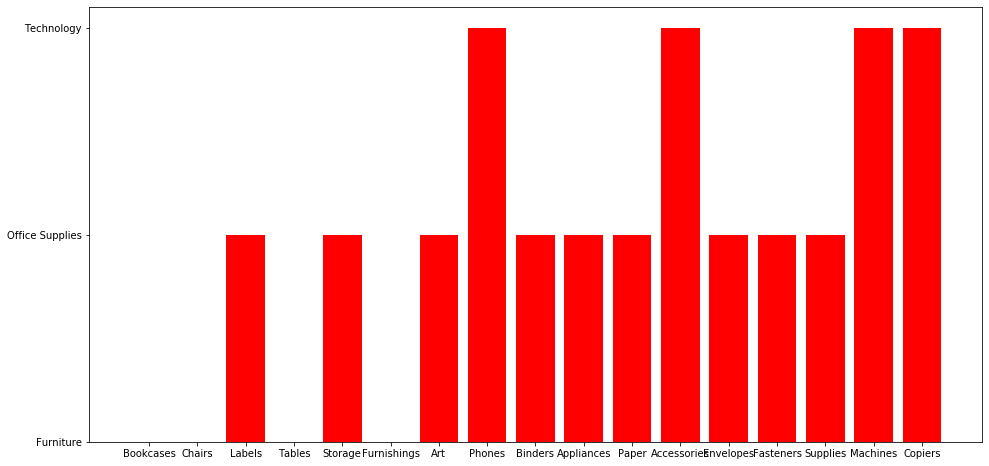

In [16]:
#Lets see how sub-categories are distributed wrt to category
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='r')
plt.show()

From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

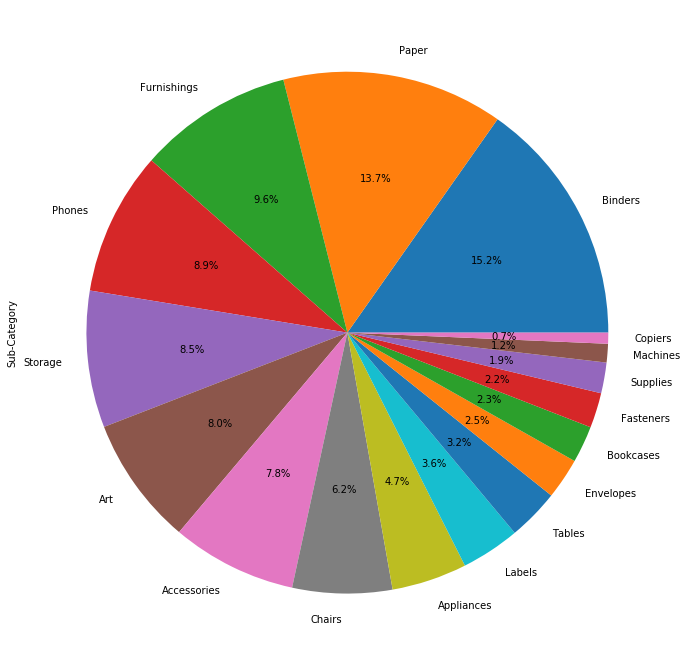

In [17]:
plt.figure(figsize=(14,12))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

The store has wide variety of Office Supplies especially in Binders and Paper department.

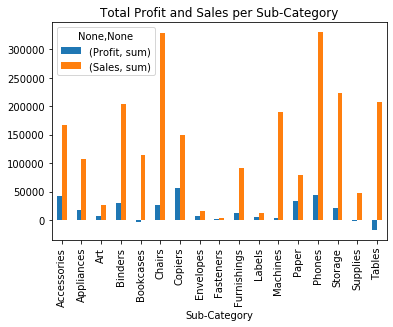

In [18]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

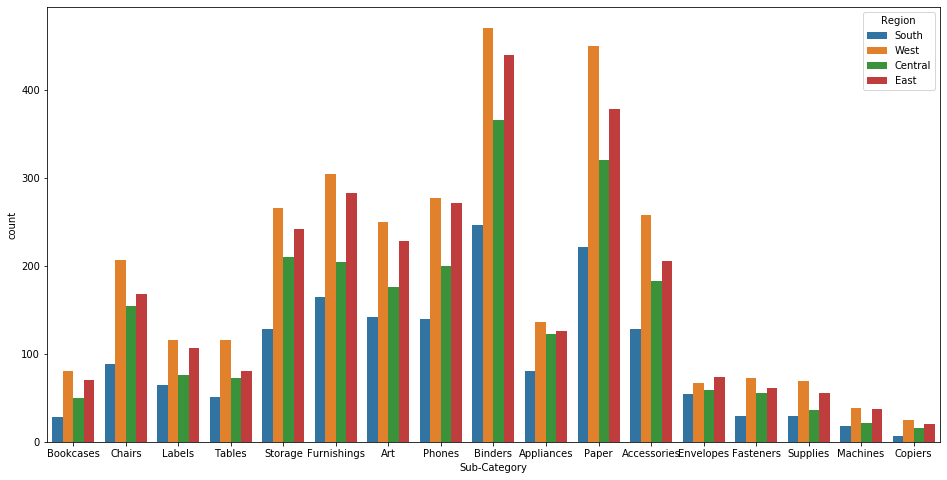

In [19]:
#Count of Sub-Category region wise
plt.figure(figsize=(16,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

People living in Western part of US prefer to order more from superstore.

To understand the data better. Lets create some new columns like Cost,Profit%

In [20]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [21]:
df['Profit %']=(df['Profit']/df['Cost'])*100

In [22]:
#Profit Percentage of first 5 product names
df.iloc[[0,1,2,3,4],[6,11]]

,Category,Profit
0,Furniture,41.9136
1,Furniture,219.5820
2,Office Supplies,6.8714
3,Furniture,-383.0310
4,Office Supplies,2.5164


In [23]:
#Products with high Profit Percentage 
df.sort_values(['Profit %','Category'],ascending=False).groupby('Profit %').head(5)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
318,Standard Class,Home Office,New York City,New York,10024,East,Technology,Machines,3991.980,2,0.0,1995.9900,1995.9900,100.000000
1696,Second Class,Home Office,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
4029,Standard Class,Consumer,Lafayette,Louisiana,70506,South,Technology,Machines,479.970,3,0.0,239.9850,239.9850,100.000000
5068,Standard Class,Home Office,Trenton,Michigan,48183,Central,Technology,Copiers,549.990,1,0.0,274.9950,274.9950,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


Retailers selling Phone,Machines,copiers have got 100% Profit in their Business.

### Now doing analysis at the customer level

In [24]:
df['Postal Code'].nunique()

631

In [25]:
#Top 10 customers who order frequently
df_top10=df['Postal Code'].value_counts().head(10)
df_top10

10035    263
10024    230
10009    229
94122    203
10011    193
94110    166
98105    165
19134    160
98103    151
90049    151
Name: Postal Code, dtype: int64

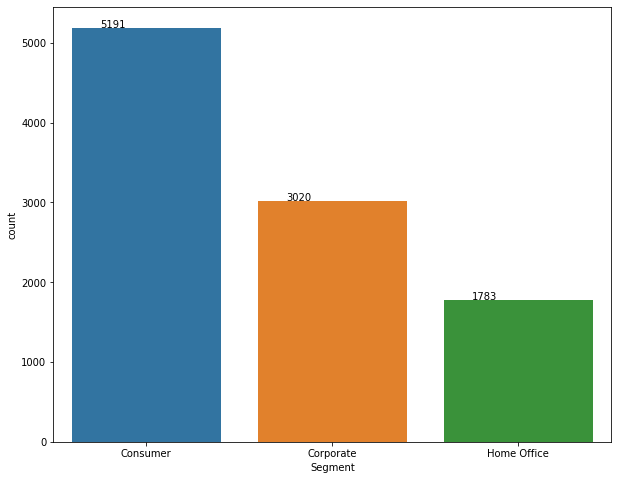

In [26]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = df)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

The distribution is highest in Consumer Segment.

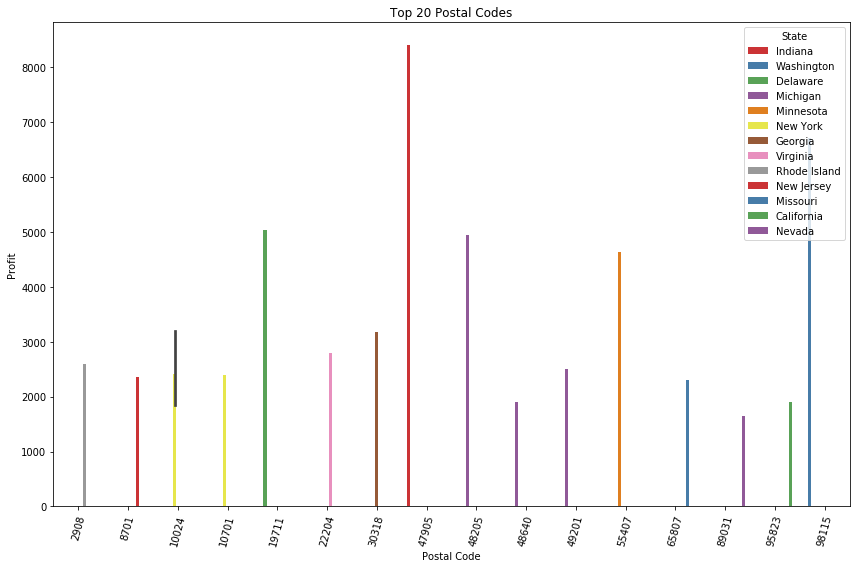

In [27]:
#Top 20 postal codes who benefitted the store
sortedTop20 = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Postal Code', y='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 Postal Codes")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()